In [1]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('DataLimpia.csv', encoding='utf8')

In [3]:
df.head(15)

fecha      hora persona                         mensaje  \
0   2019-03-08  13:14:00      x1                              XD   
1   2019-03-08  13:15:00      x2  Quien es Kike y quien ea Lalo?   
2   2019-03-08  13:15:00      x2                               🤔   
3   2019-03-08  13:16:00      x3            <Multimedia omitido>   
4   2019-03-08  13:17:00      x2                         Va jeje   
5   2019-03-08  13:25:00      x4               Naaa mms Jonathan   
6   2019-03-08  13:25:00      x4                        Jajajaja   
7   2019-03-08  13:25:00      x4            <Multimedia omitido>   
8   2019-03-08  13:27:00      x5            <Multimedia omitido>   
9   2019-03-08  13:29:00      x2                     Oooo perdon   
10  2019-03-08  13:29:00      x2       Siempre contra el negro 😭   
11  2019-03-08  13:30:00      x5                               🥺   
12  2019-03-08  19:03:00      x5            <Multimedia omitido>   
13  2019-03-08  19:04:00      x5    Que disfruten su fin chicos    
14  2019-03-08  19:04:00      x4            <Multimedia omitido>   

    etiq_minutos  num_semana  
0            416          10  
1            417          10  
2            417          10  
3            418          10  
4            419          10  
5            427          10  
6            427          10  
7            427          10  
8            429          10  
9            431          10  
10           431          10  
11           432          10  
12           765          10  
13           766          10  
14           766          10

In [4]:
dict_nombres = {'x1':'Jesús',
    'x2':'Jona',
    'x3':'Kike',
    'x4':'Joany',
    'x5':'Lalo',
    'x6':'Cesar',
    'x7':'Ro',
    'x8':'Ale',
    'x9':'Ingrid',
    'x10':'Iván',
    'x11':'Jess'}

df['persona'] = df['persona'].map(dict_nombres)

In [5]:
df.dtypes

fecha           object
hora            object
persona         object
mensaje         object
etiq_minutos     int64
num_semana       int64
dtype: object

In [6]:
def limpia_fecha_hora(text):
    lista_aux = text.split('-')
    if len(lista_aux) == 3:
        return datetime.datetime(int(lista_aux[0]), int(lista_aux[1]), int(lista_aux[2]))
    elif len(lista_aux) == 1:
        lista_aux = text.split(':')
        return datetime.time(int(lista_aux[0]), int(lista_aux[1]))

In [7]:
df['fecha'], df['hora'] = df['fecha'].map(limpia_fecha_hora), df['hora'].map(limpia_fecha_hora)

In [8]:
df.head(15)

fecha      hora persona                         mensaje  etiq_minutos  \
0  2019-03-08  13:14:00   Jesús                              XD           416   
1  2019-03-08  13:15:00    Jona  Quien es Kike y quien ea Lalo?           417   
2  2019-03-08  13:15:00    Jona                               🤔           417   
3  2019-03-08  13:16:00    Kike            <Multimedia omitido>           418   
4  2019-03-08  13:17:00    Jona                         Va jeje           419   
5  2019-03-08  13:25:00   Joany               Naaa mms Jonathan           427   
6  2019-03-08  13:25:00   Joany                        Jajajaja           427   
7  2019-03-08  13:25:00   Joany            <Multimedia omitido>           427   
8  2019-03-08  13:27:00    Lalo            <Multimedia omitido>           429   
9  2019-03-08  13:29:00    Jona                     Oooo perdon           431   
10 2019-03-08  13:29:00    Jona       Siempre contra el negro 😭           431   
11 2019-03-08  13:30:00    Lalo                               🥺           432   
12 2019-03-08  19:03:00    Lalo            <Multimedia omitido>           765   
13 2019-03-08  19:04:00    Lalo    Que disfruten su fin chicos            766   
14 2019-03-08  19:04:00   Joany            <Multimedia omitido>           766   

    num_semana  
0           10  
1           10  
2           10  
3           10  
4           10  
5           10  
6           10  
7           10  
8           10  
9           10  
10          10  
11          10  
12          10  
13          10  
14          10

# Participantes

___________
## Limpieza para quedarnos con el texto

In [76]:
other_words = ['jajajaaj', 'jajajajajajajaajjaja', 'jaja', 'jajajajajajajajaja', 'jajajajajajja', 'jajajajajaa', 'jajjajajajajaa', 'jajajaaja', 'jajaa', 'jajajajajajajajajajajajajja', 'jajajajajajajajaj', 
              'jajjjaja', 'jajajajajaj', 'jajajjaaj', 'jajajajaja', 'jajajajajajajaja', 'jajajaja', 'jajajaj', 'jajajajajajajajajajajjajaj', 'jajajajaaj', 'jajajaajajaja', 'jajajajajajajajajaajjajaaj', 
              'jajajaajaaja', 'jajajajaajaja', 'jajajajaaja', 'jajajajajajajaajaj', 'jajajajajaja', 'jajajaaaja', 'jajajajajajaj', 'jjajajajajajaa', 'jajajaajaja', 'jajajajja', 'jajajajajjajajajajajajajajaj', 
              'jajajjaa', 'jajajajaj', 'jajajajajajajajajaajjaajjajajajajajajajjajajajajajaj', 'jajajajajajajajajajajajajaj', 'jajajajajajajajajajajjaaj', 'jjajajajaaja', 'jajajajajajajaj', 'jajajajajajaja', 
              'jajajajajajajajajaj', 'jajaajajaa', 'jajajajaa', 'jajajajajajajajajja', 'jajaja', 'jajajano', 'jajajajajja', 'Jeje', 'Jejeje', 'Jejejeje', 'jajajja', 'Jajajjajja', 'Jajajjajjajaja', 'Yujuuuu', 
              'Im', 'je', 'sé', 'siii', 'Ok', 'Pa', 'Ne', 'Kike', 'Aguanya', 'amo', 'eh', 'Tss', 'teorema', 'axioma', 'drogo', 'iba', 'Ahh', 'anda', 'pasa', 'ay', 'vale', 'san', 'sale', 'Pos', 'dejar', 'Na', 
              'memes', 'veo', 'llegar', 'número', 'min', 'ten', 'vi', 'Uju', 'Ots', 'Siiiiii', 'Enrique', 'jejejejejeje', 'Naaa', "pa'", 'Chris', 'vava', 'amm', 'ahhh', 'Jo', 'Mmmmm', 'yaaa', 'vavavava', 'Villegas', 
              'Aaaa', 'maj', 'vavavavava', 'ToT', 'já', 'vendé', 'jajjaja', 'Yei', "14'", 'Vaa', 'Khe', 'vaa', 'khe', 'Jejejejeje', 'jajajjaja', 'Dijiste', 'Ohhh', 'Jejejejeje', 'memen', 'GG', 'gg', 'Gg', 'Yaaaa', 
              'Pal', 'Jajajajjajaja', 'tb', 'Quique', 'Oooh', 'ehhh', 'Vaaaaa', 'ahhh', 'jun', 'hahaha', 'Navarrete', 'Jajajajjaa', 'MXN', 'nan', 've', 'ah', 'https']

Sin Kike

In [10]:
df_mensajes = df[df['persona'] != 'Kike'][['persona', 'mensaje']]
#df_mensajes = df[['persona', 'mensaje']]

In [11]:
df_mensajes = df_mensajes[df_mensajes['mensaje'] != '<Multimedia omitido>'].copy()

## ¿Quienes participan?

In [12]:
print('Hay un total de', df_mensajes['persona'].nunique(), 'personas.')

Hay un total de 10 personas.


In [13]:
import emoji

def extract_text(str):
    return ''.join(c for c in str if c not in emoji.UNICODE_EMOJI)

In [14]:
df_mensajes['mensaje'] = df_mensajes['mensaje'].map(extract_text)

df_mensajes = df_mensajes[~((df_mensajes['mensaje'] == '')|(df_mensajes['mensaje'] == ' '))].copy()

df_mensajes.reset_index(drop=True, inplace=True)

## Preparación de la nube de palabras

In [15]:
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud

path = '../../Data/stopwords2.txt'
stopword = pd.read_csv(path, encoding = 'latin1', header = None)[0].tolist()

In [85]:
stopword += other_words

cv = CountVectorizer(stop_words = stopword)

wc = WordCloud(stopwords=stopword, background_color = "black", colormap = "Dark2",
               max_font_size=150, random_state=42, width=1200, height=600, max_words=125)

## Generación de la nube de palabras

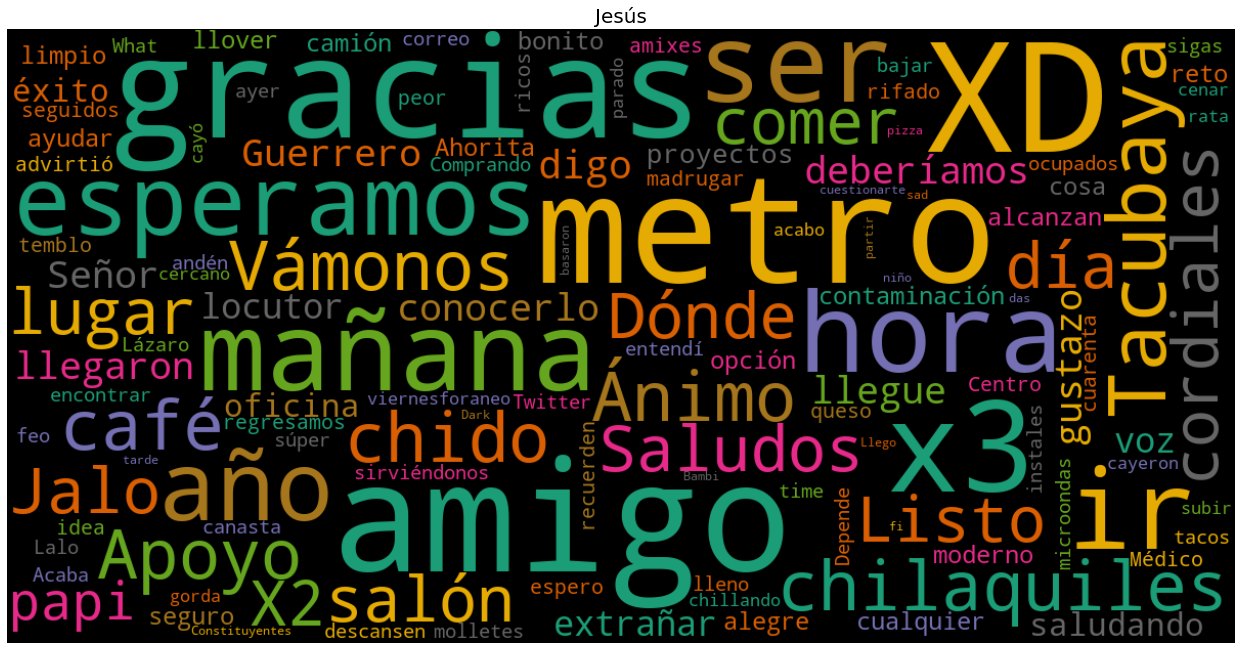

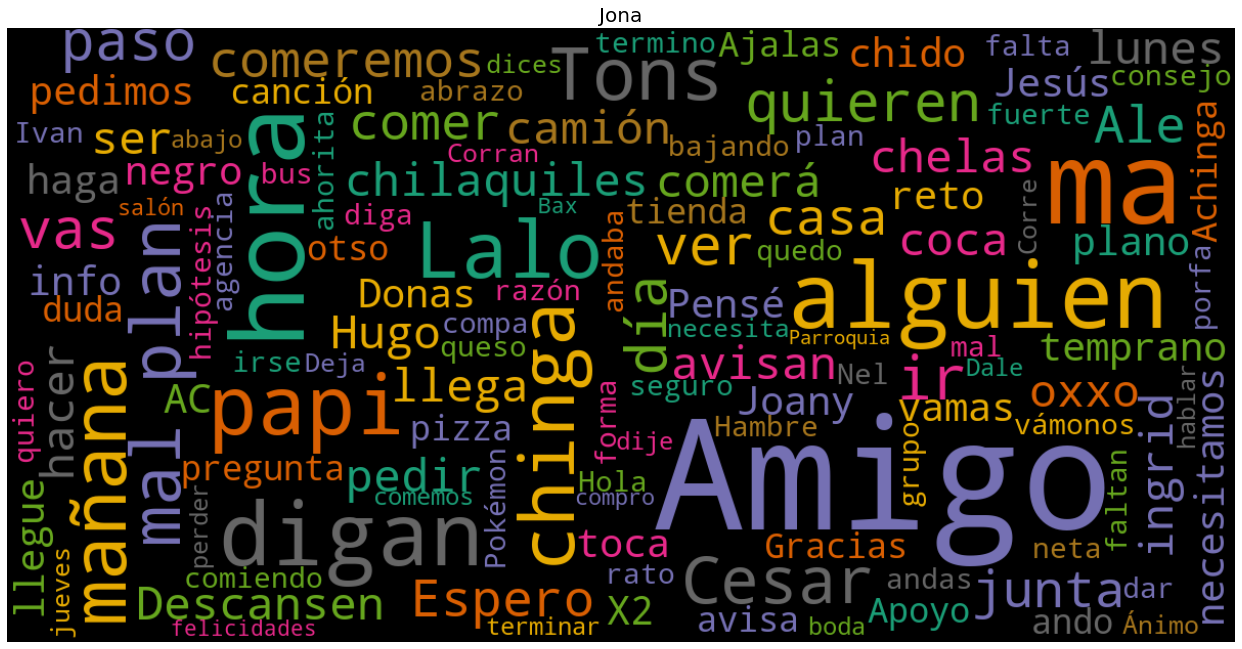

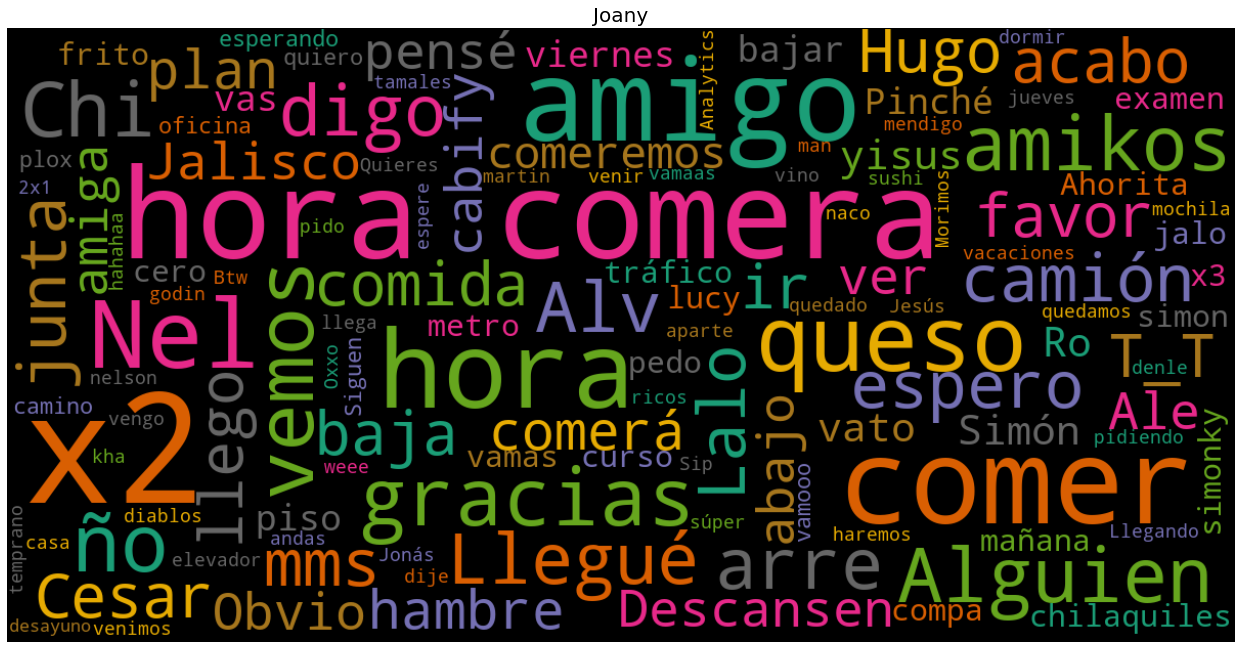

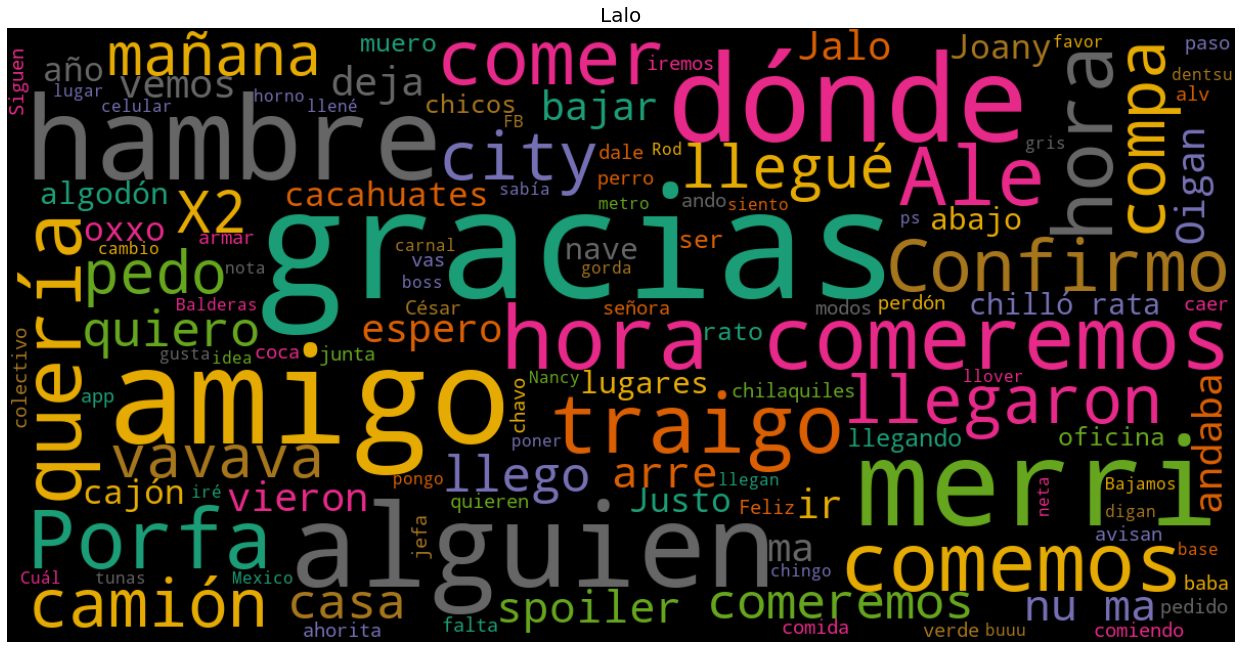

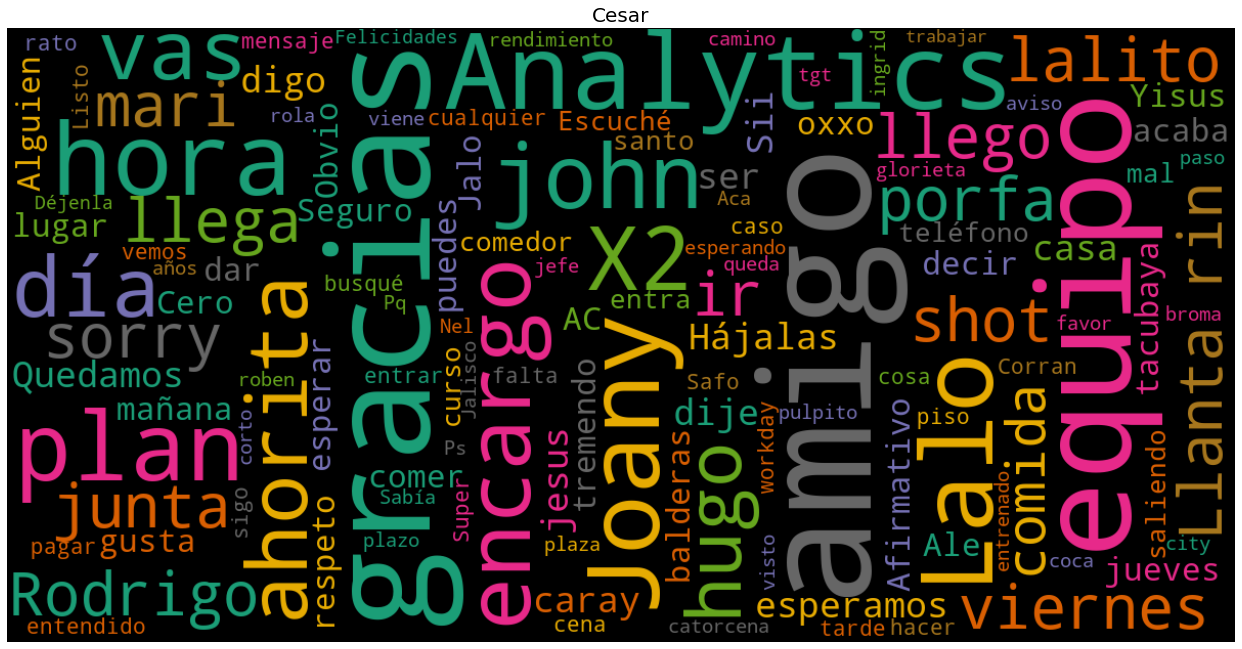

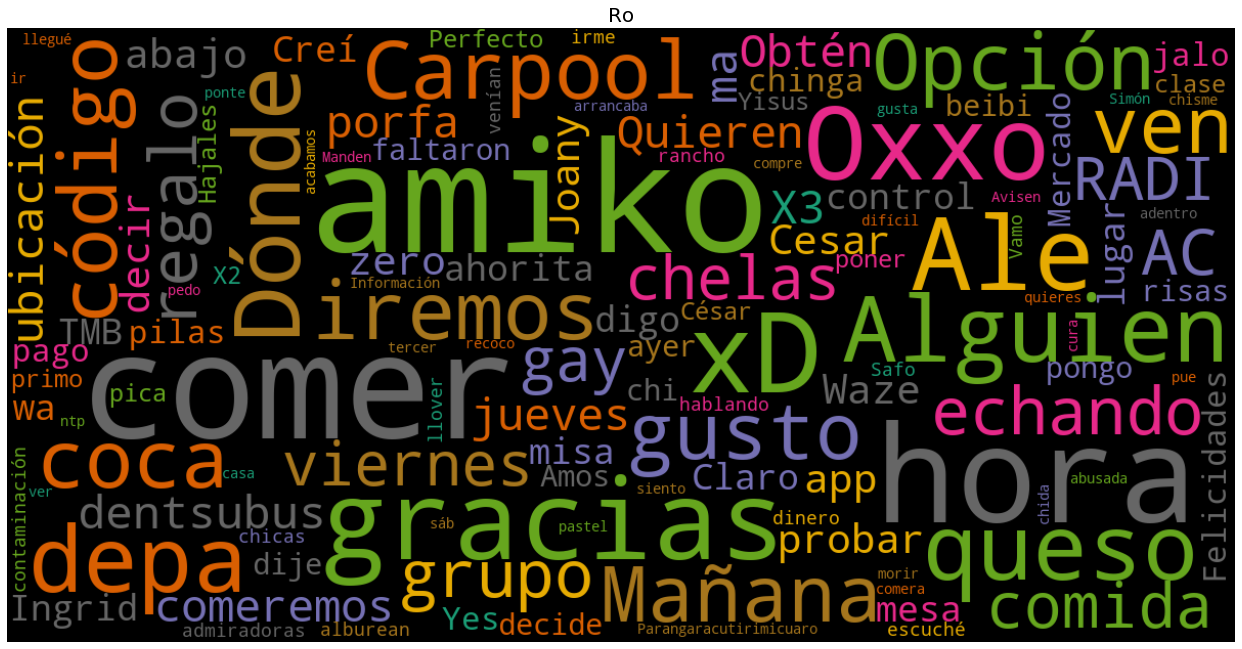

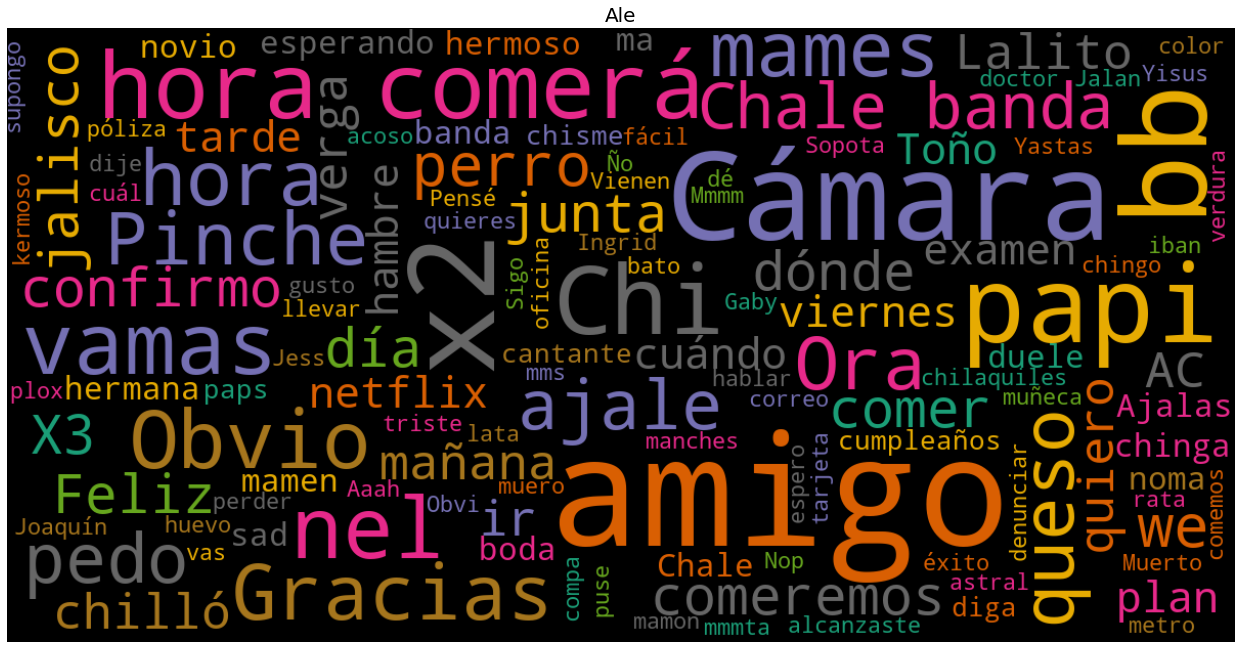

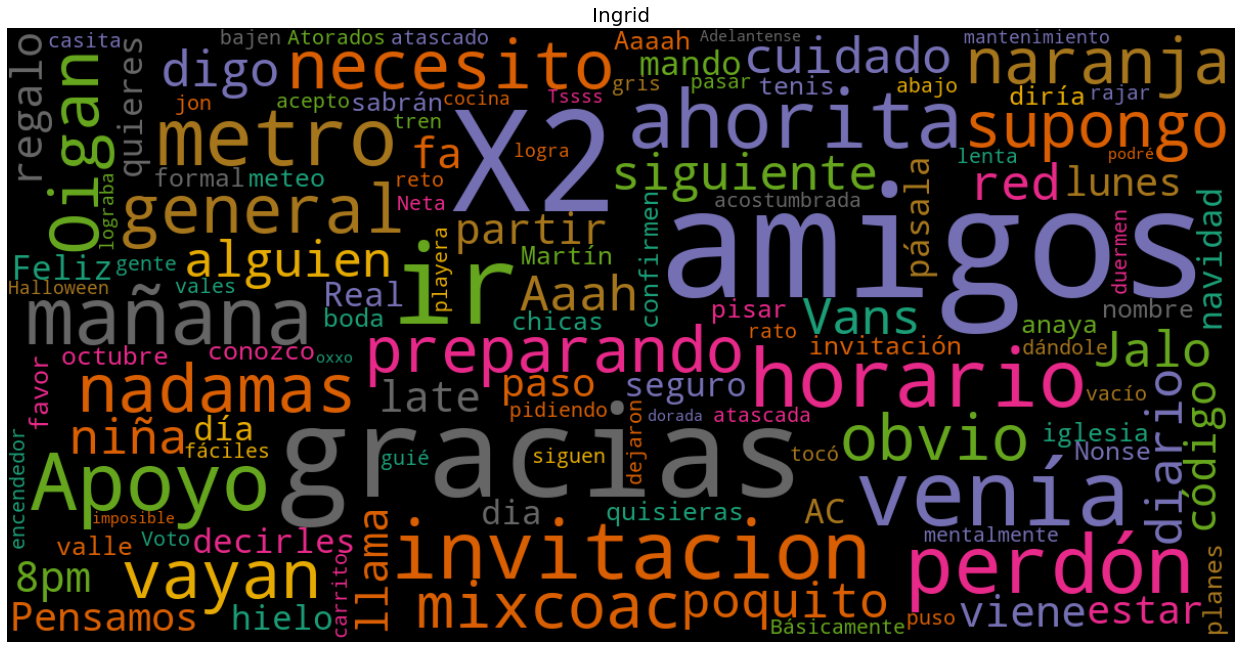

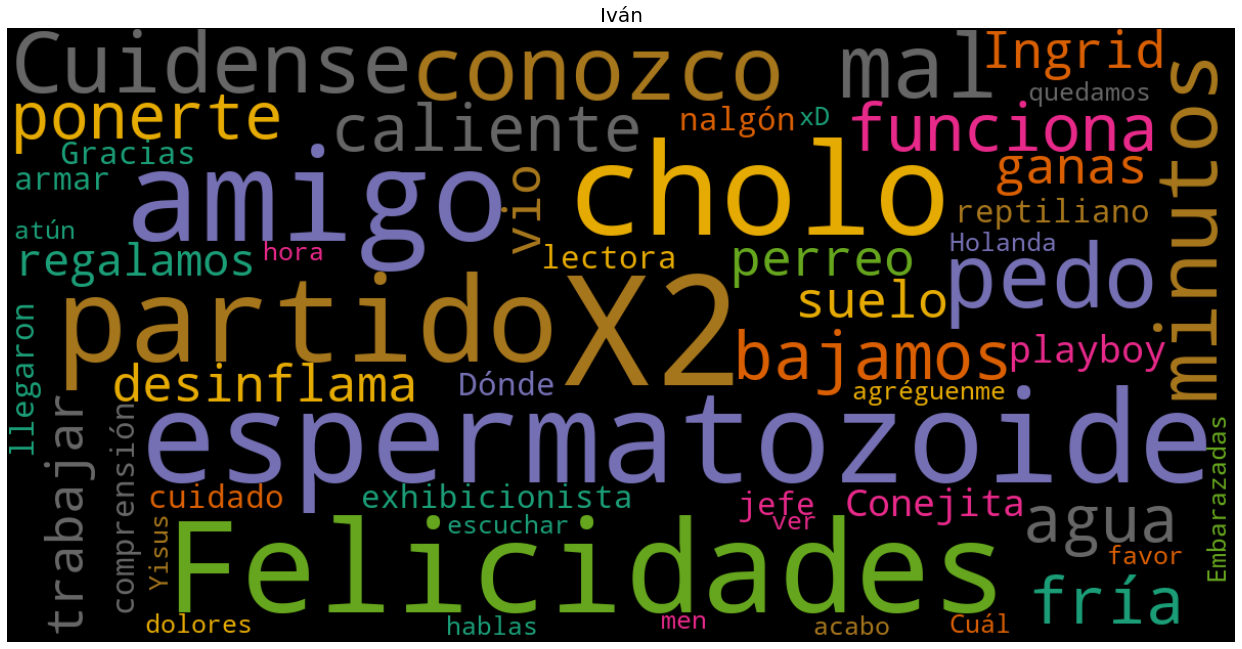

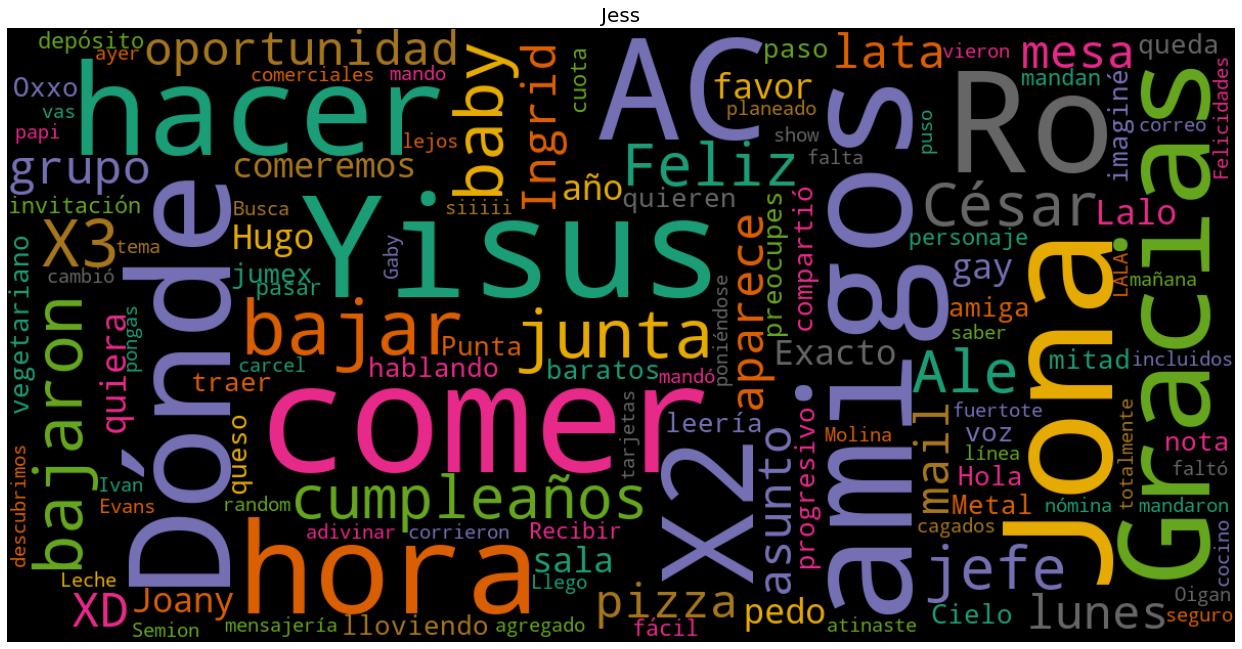

In [86]:
personas = df_mensajes['persona'].unique().tolist()

for persona in personas:
    texto = ' '
    #print(persona, df_texto[df_texto['persona'] == persona].shape)
    for mensaje in df_mensajes[df_mensajes['persona'] == persona]['mensaje'].tolist():
        texto += mensaje + ' '
    wc.generate(texto)
    plt.subplots(figsize = (22, 14))
    plt.imshow(wc)
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(persona, fontsize = 20)
    plt.show()
    print('\n\n')

## ¿Quién manda más mensajes de whats?

In [18]:
prs = df[df['persona'] != 'Kike']['persona'].value_counts().index.tolist()

mens_txt = df['persona'][df['mensaje'] != '<Multimedia omitido>'].value_counts().loc[prs].tolist()

mens_mem = df['persona'][df['mensaje'] == '<Multimedia omitido>'].value_counts().loc[prs].tolist()

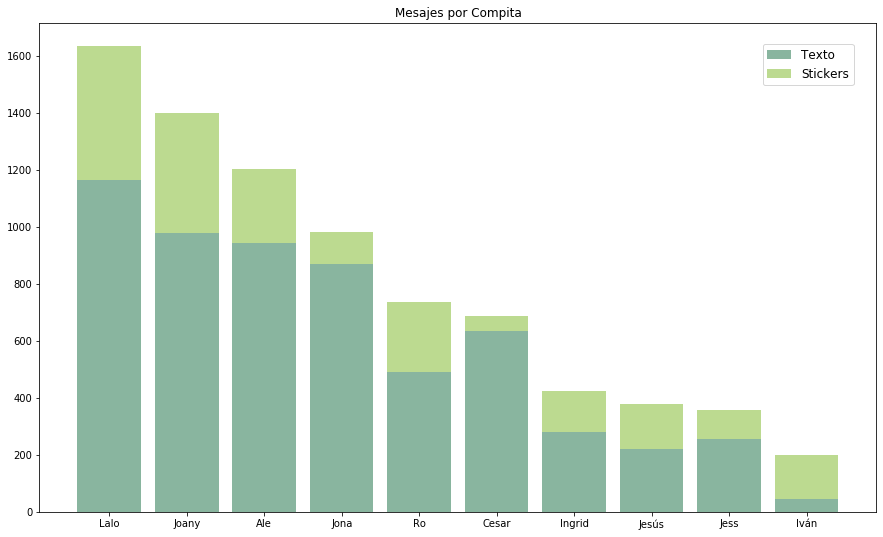

In [19]:
plt.figure(figsize=(15, 9))
p1 = plt.bar(prs, mens_txt, 0.82, color = '#89B59F')
p2 = plt.bar(prs, mens_mem, 0.82, bottom=mens_txt, color='#BCDA90')
plt.legend((p1[0], p2[0]), ('Texto', 'Stickers'), bbox_to_anchor=(.98, .97), prop={'size': 12})
plt.title('Mesajes por Compita')
plt.show()

In [20]:
dict_prop = {'Quien':[], 'Stickers':[], 'Mensajes':[]}

for mem, txt, pers in zip(mens_mem, mens_txt, prs):
    total = mem + txt
    dict_prop['Quien'].append(pers)
    #print(pers)
    dict_prop['Stickers'].append(round(mem/total, 3))
    dict_prop['Mensajes'].append(round(txt/total, 3))
    #print(round(mem/total, 3))
    #print(round(txt/total, 3))
    #print('\n')

In [21]:
pd.DataFrame(dict_prop).sort_values('Stickers', ascending=False)

Quien  Stickers  Mensajes
9    Iván     0.771     0.229
7   Jesús     0.420     0.580
6  Ingrid     0.336     0.664
4      Ro     0.332     0.668
1   Joany     0.302     0.698
0    Lalo     0.288     0.712
8    Jess     0.277     0.723
2     Ale     0.215     0.785
3    Jona     0.114     0.886
5   Cesar     0.076     0.924

In [22]:
print(df['fecha'].min().strftime('%d/%m/%Y'))
print(df['fecha'].max().strftime('%d/%m/%Y'))

08/03/2019
29/01/2020


color = sns.color_palette("Greens_r", 15)
jerarq = df['persona'].value_counts().index.tolist()

sns.catplot(x = 'persona', kind='count', data=df, aspect=2, height=7, order=jerarq, palette=color)
plt.title('Quién manda más whats')
plt.show()

# Distribución Mensajes en el año

In [23]:
df.head()

fecha      hora persona                         mensaje  etiq_minutos  \
0 2019-03-08  13:14:00   Jesús                              XD           416   
1 2019-03-08  13:15:00    Jona  Quien es Kike y quien ea Lalo?           417   
2 2019-03-08  13:15:00    Jona                               🤔           417   
3 2019-03-08  13:16:00    Kike            <Multimedia omitido>           418   
4 2019-03-08  13:17:00    Jona                         Va jeje           419   

   num_semana  
0          10  
1          10  
2          10  
3          10  
4          10

In [24]:
by_date = pd.DataFrame(df.groupby('fecha')['mensaje'].count().sort_index())

In [25]:
by_date

mensaje
fecha              
2019-03-08       16
2019-03-12       54
2019-03-13       48
2019-03-14        5
2019-03-19        4
...             ...
2020-01-24       40
2020-01-26       53
2020-01-27       83
2020-01-28       28
2020-01-29       37

[241 rows x 1 columns]

In [26]:
by_date['weekday'] = by_date.index.weekday

In [27]:
by_date['week'] = by_date.index.week

In [28]:
by_date.head()

mensaje  weekday  week
fecha                             
2019-03-08       16        4    10
2019-03-12       54        1    11
2019-03-13       48        2    11
2019-03-14        5        3    11
2019-03-19        4        1    12

by_date = pd.merge(by_date, df[['fecha', 'num_semana']], on='fecha', how='inner')

In [29]:
import numpy as np

In [30]:
week = 0
prev_week = by_date.iloc[0]["week"]
continuous_week = np.zeros(len(by_date)).astype(int)
sunday_dates = []
for i, (_, row) in enumerate(by_date.iterrows()):
    if row["week"] != prev_week:
        week += 1
        prev_week = row["week"]
    continuous_week[i] = week
by_date["continuous_week"] = continuous_week 
by_date.head()

mensaje  weekday  week  continuous_week
fecha                                              
2019-03-08       16        4    10                0
2019-03-12       54        1    11                1
2019-03-13       48        2    11                1
2019-03-14        5        3    11                1
2019-03-19        4        1    12                2

In [31]:
songs = np.full((7, continuous_week.max()+1), np.nan)

for index, row in by_date.iterrows():
    songs[row["weekday"]][row["continuous_week"]] = row["mensaje"]

In [32]:
pd.DataFrame(songs)

0     1     2     3     4      5     6     7     8     9   ...    38  \
0   NaN   NaN   NaN  14.0   NaN   24.0  19.0  39.0  30.0  22.0  ...  16.0   
1   NaN  54.0   4.0   NaN  85.0  136.0   6.0  92.0  25.0  47.0  ...  36.0   
2   NaN  48.0  10.0  13.0  44.0   28.0  14.0  26.0   2.0  47.0  ...  22.0   
3   NaN   5.0   NaN  19.0  42.0  100.0   NaN  27.0  25.0  68.0  ...  24.0   
4  16.0   NaN  23.0  48.0  20.0   46.0   NaN  48.0  35.0   7.0  ...  93.0   
5   NaN   NaN   NaN   NaN   NaN    NaN   NaN   NaN   NaN   NaN  ...  36.0   
6   NaN   NaN   NaN   NaN   NaN    NaN   NaN   NaN   NaN   NaN  ...   4.0   

     39    40    41    42    43    44     45     46    47  
0  25.0  58.0  10.0  10.0   4.0  28.0   14.0   11.0  83.0  
1  18.0  62.0  10.0  29.0   3.0   2.0    NaN   78.0  28.0  
2   4.0  25.0  21.0   NaN  37.0   6.0    NaN  285.0  37.0  
3  29.0  11.0  14.0   NaN  28.0  19.0  126.0   70.0   NaN  
4   6.0  40.0  33.0  43.0   4.0   1.0    7.0   40.0   NaN  
5   NaN   NaN   NaN   5.0   NaN   NaN    NaN    NaN   NaN  
6   NaN   NaN   9.0   NaN   NaN   NaN   19.0   53.0   NaN  

[7 rows x 48 columns]

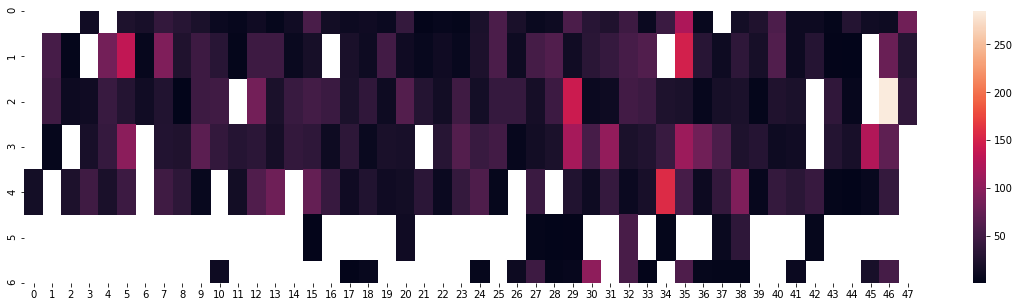

In [33]:
fig = plt.figure(figsize=(20,5))
ax = plt.subplot()
mask = np.isnan(songs)
sns.heatmap(songs, ax = ax)

In [34]:
import datetime

In [35]:
import calendar

In [36]:
min_date = df["fecha"].min()
first_monday = min_date - datetime.timedelta(min_date.weekday())
mons = [first_monday + datetime.timedelta(weeks=wk) for wk in range(continuous_week.max())]
x_labels = [calendar.month_abbr[mons[0].month]]
x_labels.extend([
    calendar.month_abbr[mons[i].month] if mons[i-1].month != mons[i].month else "" 
    for i in range(1, len(mons))])

y_labels = ["Lun", "", "Mie", "", "Vie", "", "Dom"]

In [37]:
x_labels[4] = 'Abr'
x_labels[22] = 'Ago'
x_labels[39] = 'Dic'
x_labels[44] = 'Ene'

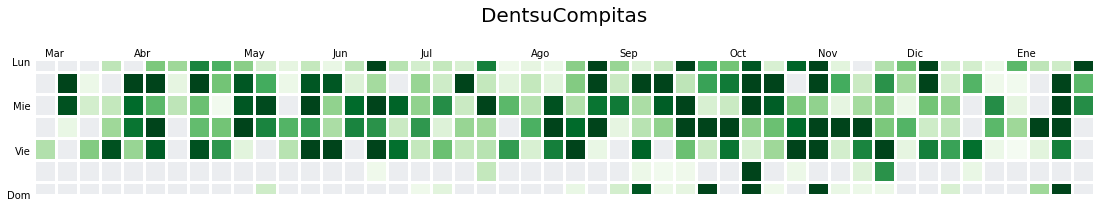

In [38]:
fig = plt.figure(figsize=(19,5))
ax = plt.subplot()

ax.set_title("DentsuCompitas", fontsize=20,pad=40)
ax.xaxis.tick_top()
ax.tick_params(axis='both', which='both',length=0)
ax.set_facecolor("#ebedf0") 
fig.patch.set_facecolor('white')

sns.heatmap(songs, linewidths=2, linecolor='white', square=True,
            mask=np.isnan(songs), cmap="Greens",
            vmin=0, vmax=50, cbar=False, ax=ax)

ax.set_yticklabels(y_labels, rotation=0)
ax.set_xticklabels(x_labels, ha="left")
pass

# Top 5 días con más actividad

In [73]:
top_fechas = by_date.sort_values('mensaje', ascending=False).head(5)['mensaje'].index.tolist()

by_date.sort_values('mensaje', ascending=False).head(5)['mensaje']

fecha
2020-01-22    285
2019-11-01    158
2019-11-05    149
2019-09-25    143
2019-04-09    136
Name: mensaje, dtype: int64

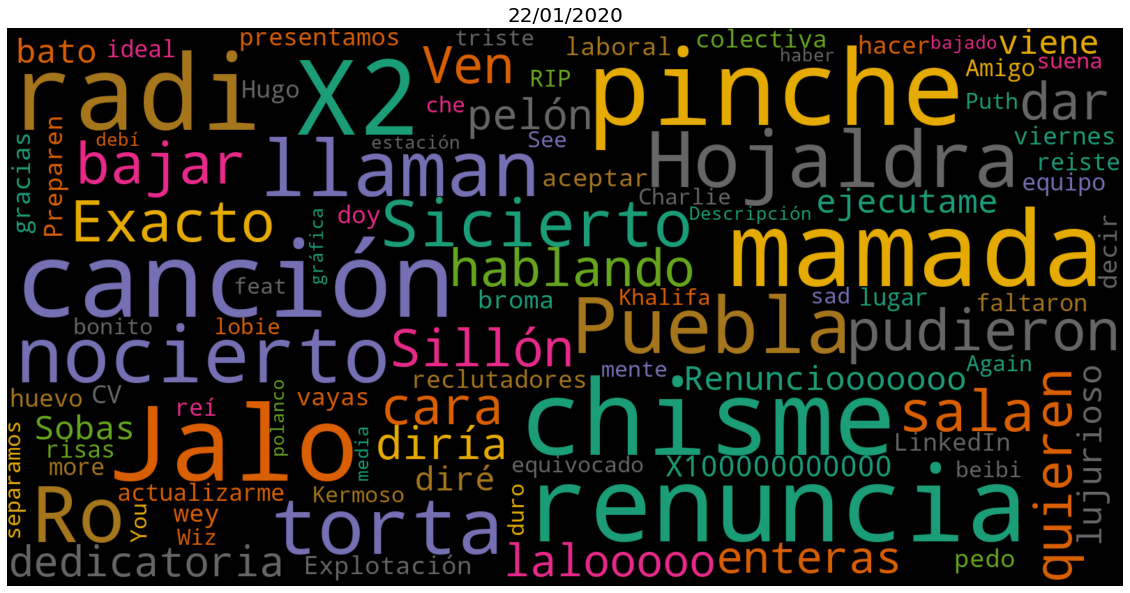

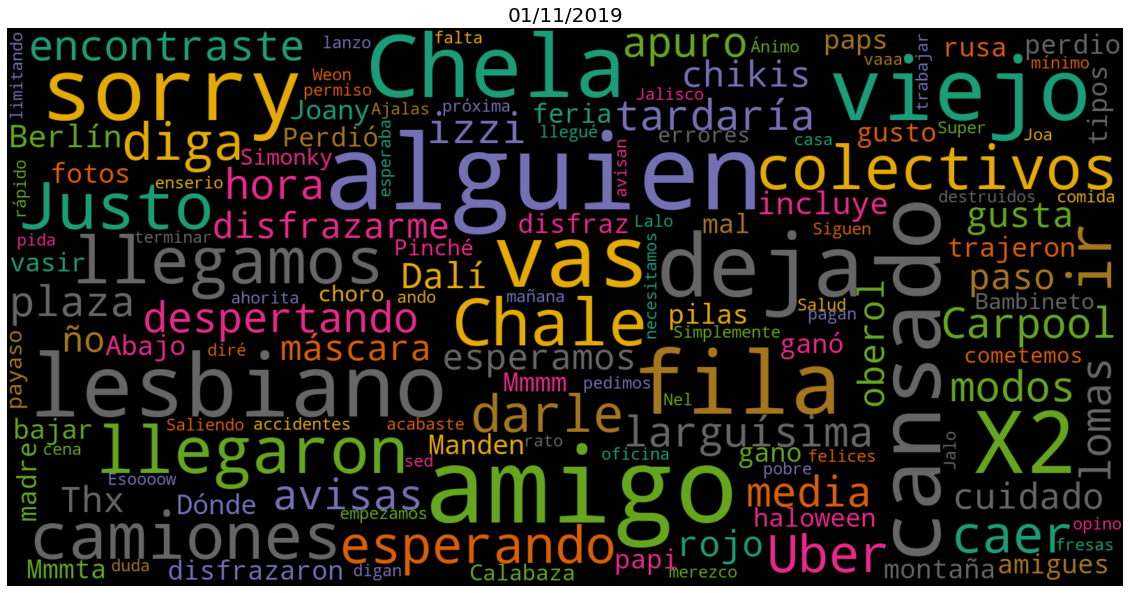

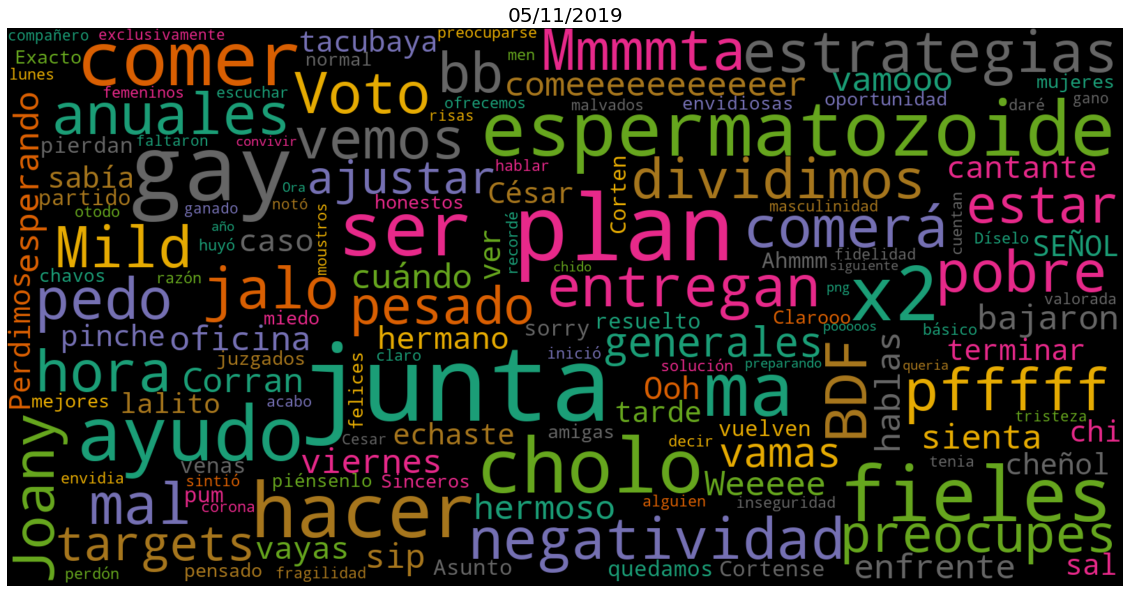

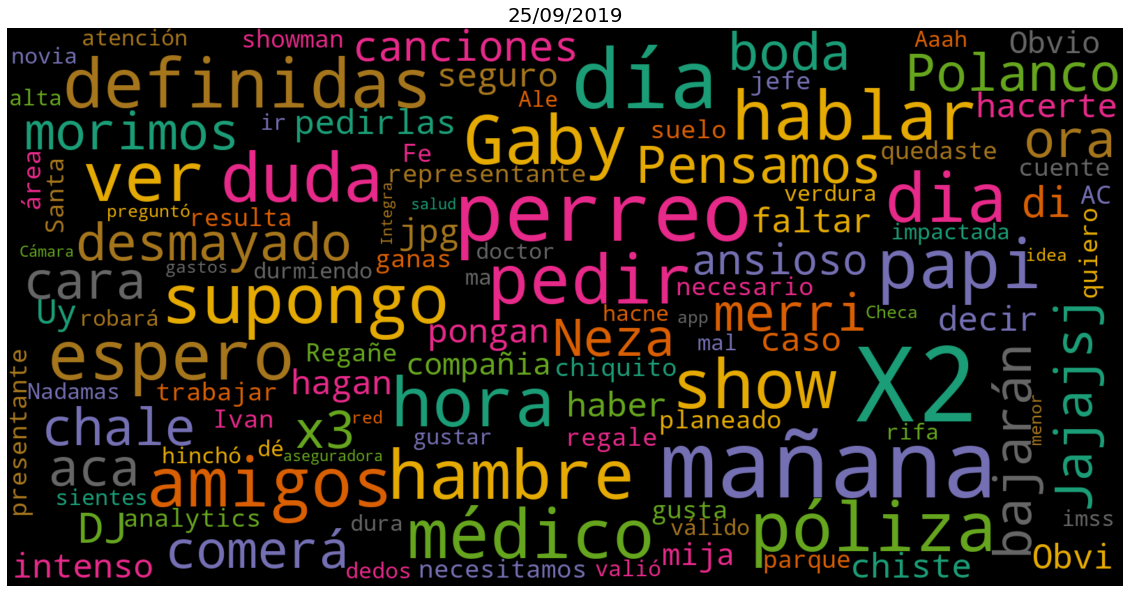

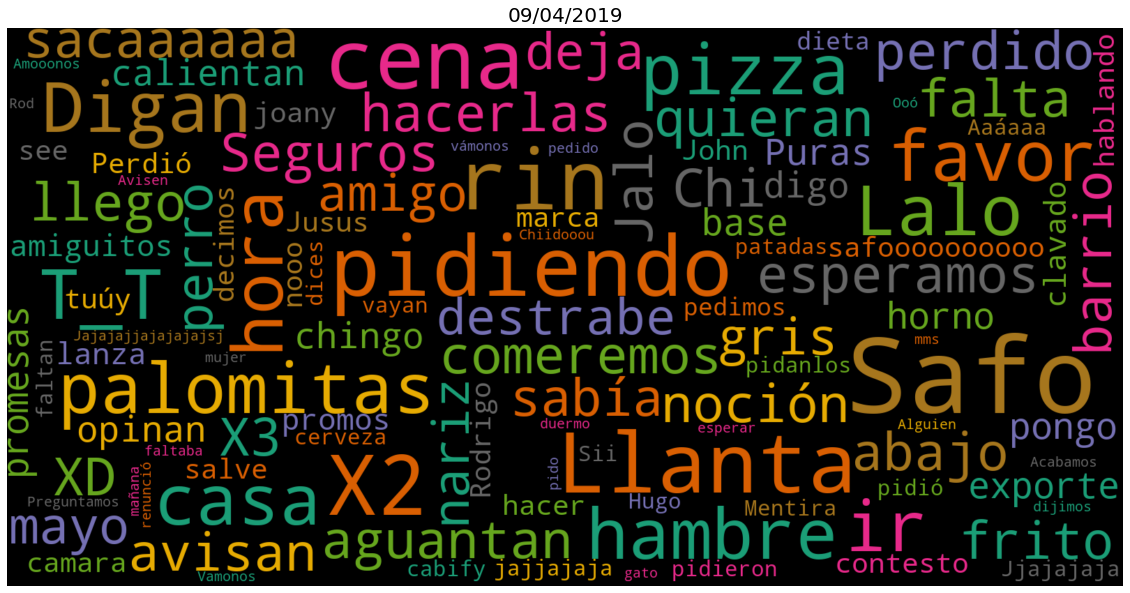

In [82]:
wc = WordCloud(stopwords=stopword, background_color = "black", colormap = "Dark2",
               max_font_size=150, random_state=42, width=1600, height=800, max_words=150)

for fecha in top_fechas:
    texto = ' '
    #print(persona, df_texto[df_texto['persona'] == persona].shape)
    for mensaje in df[df['fecha'] == fecha.strftime('%Y-%m-%d')]['mensaje'].tolist():
        if mensaje != '<Multimedia omitido>':
            texto += mensaje + ' '
    wc.generate(texto)
    plt.subplots(figsize = (20, 12))
    plt.imshow(wc)
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(fecha.strftime('%d/%m/%Y'), fontsize = 20)
    plt.show()
    print('\n\n')